In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
import utils
from detector import *
pups = utils.load_json('pattern0', 'pupils')
real_glints = utils.load_json('pattern0', 'glints')

In [34]:
pupil_difference = []
for i in range(45):
    pupil = find_pupil('inputs/images/pattern0/{}.jpg'.format(str(i)), False)
    pupil_center = pupil[0] # from our implementation
    pupil_real_center = (pups[i]['cx'], pups[i]['cy']) # coordinates for x and y for the centres
    pupil_difference.append((i, utils.dist_tuple(pupil_center, pupil_real_center)))
    
pupil_difference.sort(key=lambda x: x[1])# how it is sorted 
pupil_difference.reverse()
print(pupil_difference) #Distance between centre of our implementation and real value
    
   


[(1, 3.495347966167747), (32, 2.728611292361676), (41, 2.37015280521949), (38, 2.1415227468580222), (5, 2.025938273675037), (8, 1.4970528611069915), (40, 1.346142236730376), (44, 1.287175776298466), (37, 0.690979824903014), (39, 0.6638224730692122), (7, 0.5899909150485022), (11, 0.5895552103136255), (2, 0.5748152464863447), (22, 0.5643906989853442), (9, 0.5553760989161319), (26, 0.548342401595362), (42, 0.5134225365289008), (6, 0.49808350690126413), (28, 0.4929043125913856), (20, 0.49021481217528207), (17, 0.48871934882746326), (12, 0.4306165718743873), (27, 0.4248081294830137), (18, 0.419046465348622), (35, 0.41613537224602065), (13, 0.3911895677554847), (10, 0.3893492025904944), (43, 0.37903501133073064), (4, 0.34181611824361363), (29, 0.31395116460317024), (36, 0.293780792491712), (24, 0.2872033358760647), (30, 0.2558393197535143), (25, 0.2537863301474584), (3, 0.24473781978413953), (0, 0.23973082087829173), (34, 0.23857731873742474), (19, 0.22312804689183593), (31, 0.20269621239971

In [53]:
glints_difference = []
for i in range(45):
    my_glint = find_glints('inputs/images/moving_medium/{}.jpg'.format(str(i)),pupil_center,False)
    original_glints = sorted(real_glints[i])
    sorted(my_glint)
    distance = []
    for j in range(len(original_glints)):
        x = my_glint[j][0] - original_glints[j][0]
        y = my_glint[j][1] - original_glints[j][1]
        t = ( abs(x), abs(y))
        distance.append(t)
   
    glints_difference.append(distance)
    

#print(glints_difference)

median pupils


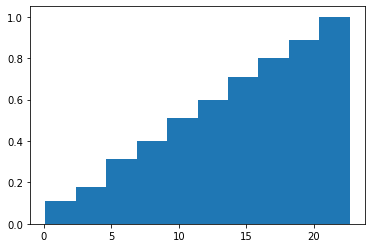

mean pupils


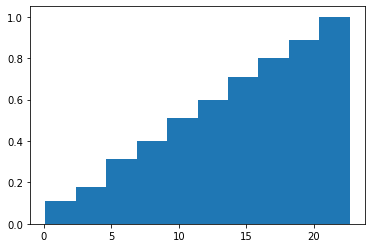

median glints


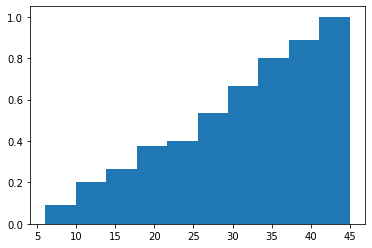

mean glints


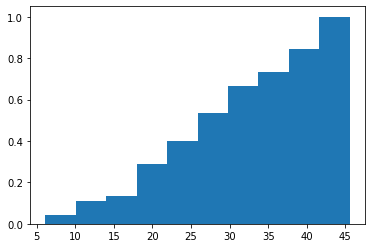

In [46]:
# 4. verify how sorted work for median
import numpy as np
from matplotlib import pyplot as plt

med_pups = [ np.median(x) for x in pupil_difference ]
mean_pups = [ np.mean(x) for x in pupil_difference]

med_glints = [ np.median(x) for x in glints_difference ]
mean_glints = [ np.mean(x) for x in glints_difference ]

print('median pupils')  
plt.hist(med_pups, cumulative=True,density=True)
plt.show()

print('mean pupils')  
plt.hist(mean_pups,cumulative=True,density=True)
plt.show()

print('median glints')  
plt.hist(med_glints,cumulative=True,density=True)
plt.show()

print('mean glints')  
plt.hist(mean_glints,cumulative=True,density=True)
plt.show()


In [43]:
#Interaction Over Union
pupil_iou = []
for i in range(45):
    
    pupil = find_pupil('inputs/images/pattern0/{}.jpg'.format(str(i)), False)
    val_Rx = pups[i]['cx']
    val_Ry = pups[i]['cy']
    real = [val_Rx,val_Ry]
    #print("real",real)
    val_Px = pupil[0][0]
    val_Py = pupil[0][1]
    predicted = [val_Px,val_Py]
    #print("predicted",predicted)
   # axes = (1,2)
    p= np.multiply(real,predicted)
    intersection = np.sum(np.abs(p ), axis=0)
    #print("intersection", intersection)
    mask = np.sum(np.abs(real), axis=0) + np.sum(np.abs(predicted), axis=0)
    union = mask - intersection
    smooth = .001
    iou = (intersection + smooth) / (union + smooth)
    pupil_iou.append(iou)
print(pupil_iou)
   

    #axes = (1,2) 
    #intersection = np.sum(np.abs(predicted * real  ), axis=axes)
    #mask = np.sum(np.abs(real), axis=axes) + np.sum(np.abs(predicted), axis=axes)
    #union = mask - intersection
    #smooth = .001
    #iou = (intersection + smooth) / (union + smooth)
    #pupil_iou.append(iou)
    
#We might need to change the layout of the histogram with N
        
    



[-1.0070142307746024, -1.0077519585603205, -1.0083361969958597, -1.0069487979230753, -1.0076260444662923, -1.0081357654174925, -1.0068856991999142, -1.0074426736401154, -1.0078807322699361, -1.0070096165652926, -1.0073065924024192, -1.007647511663273, -1.0079351857847265, -1.008178477221031, -1.008383519796785, -1.0070215886968585, -1.0073201285975346, -1.007642096848248, -1.007938213953034, -1.0081966903494766, -1.0083691952080904, -1.0070366401190272, -1.0073143193675107, -1.007609037339526, -1.0078717875621352, -1.00810864792729, -1.008287752661007, -1.0069970702646556, -1.0072610542146154, -1.007558803705395, -1.0078084827464, -1.0080350391680672, -1.0081796805204466, -1.0069899118557863, -1.0072438644625892, -1.0075145818584652, -1.0077591710005787, -1.0079567276304073, -1.0081241307768292, -1.0069732136796845, -1.0072169328907021, -1.0074641394471395, -1.0076884957671286, -1.0078797362437852, -1.0080392764254549]


IOU pupils


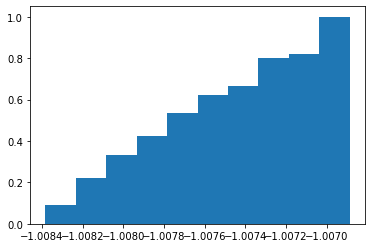

In [47]:
print('IOU pupils')  
plt.hist(pupil_iou, cumulative=True,density=True)
plt.show()

In [69]:
threshold = 10
count = 0
for i in range(45):
   
    print(glints_difference[i])
    list1 = list(glints_difference[i][0])
    list2 = list(glints_difference[i][1])
    list3 = list(glints_difference[i][2])
    list4 = list(glints_difference[i][3])
    print(list1)
    print(list2)
    print(list3)
    print(list4)
    if (list1[0]<=20) and  (list1[1]<=20):
        count= count +1
    




[(67.67619047619047, 30.23809523809524), (21.24444444444447, 37.5), (26.609929078014204, 15.858156028368796), (28.360360360360346, 12.639639639639654)]
[67.67619047619047, 30.23809523809524]
[21.24444444444447, 37.5]
[26.609929078014204, 15.858156028368796]
[28.360360360360346, 12.639639639639654]
[(2.6761904761904702, 30.76190476190476), (0.6565656565656468, 5.888888888888886), (28.96296296296299, 59.90740740740742), (93.96666666666664, 31.694444444444457)]
[2.6761904761904702, 30.76190476190476]
[0.6565656565656468, 5.888888888888886]
[28.96296296296299, 59.90740740740742]
[93.96666666666664, 31.694444444444457]
[(3.343434343434353, 31.111111111111114), (1.4736842105263008, 8.877192982456137)]


IndexError: list index out of range

In [57]:
print(glints_difference[1])

[(2.6761904761904702, 30.76190476190476), (0.6565656565656468, 5.888888888888886), (28.96296296296299, 59.90740740740742), (93.96666666666664, 31.694444444444457)]


In [58]:
print(glints_difference[40])

[(22.0, 25.0), (59.5, 27.0), (64.0, 42.5)]


In [59]:
print(glints_difference)

[[(67.67619047619047, 30.23809523809524), (21.24444444444447, 37.5), (26.609929078014204, 15.858156028368796), (28.360360360360346, 12.639639639639654)], [(2.6761904761904702, 30.76190476190476), (0.6565656565656468, 5.888888888888886), (28.96296296296299, 59.90740740740742), (93.96666666666664, 31.694444444444457)], [(3.343434343434353, 31.111111111111114), (1.4736842105263008, 8.877192982456137)], [(67.63963963963965, 38.639639639639654), (80.0, 11.0), (27.5, 4.241666666666674), (50.241666666666674, 59.5)], [(2.5, 29.5), (0.0, 7.5), (89.70666666666665, 14.0), (0.39007092198579585, 26.858156028368796)], [(1.0, 12.844444444444434), (0.5, 12.5)], [(2.111111111111086, 11.343434343434353), (1.6913580246913398, 12.135802469135797), (106.89999999999998, 13.039999999999992), (48.5, 62.5)], [(1.8541666666666856, 12.854166666666657), (1.5, 12.0), (91.13605442176873, 13.721088435374156), (1.6231884057971229, 29.0)], [(1.0, 10.844444444444434), (1.2444444444444684, 11.5)], [(54.639639639639654, 

In [ ]:
(x1,y1), x2, y2, x3, y3 , x4,y4
 if (x1 <5 & y1 <5) && (x1 <5 & y1 <5)
    count = count+1